<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Лабораторная 7-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Лабораторная 7-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Лабораторная 7(Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Лабораторная 7 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here
tr_mcc_codes=pd.read_csv('tr_mcc_codes.csv',sep=';')
tr_types=pd.read_csv('tr_types.csv',sep=';')
gender_train=pd.read_csv('gender_train.csv',sep=',')
transactions=pd.read_csv('transactions.csv',sep=',',nrows=1000000)

#### Task 0.
Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
### Type your code here
transactions = pd.merge(transactions, tr_types, on='tr_type', how='inner')
transactions = pd.merge(transactions, tr_mcc_codes, on='mcc_code', how='inner')

# Соединение таблицы gender_train с transactions через left join
merged_data = pd.merge(transactions, gender_train, on='customer_id', how='left')

# Удаление ненужных таблиц
merged_data = merged_data.drop(['tr_type', 'mcc_code'], axis=1)

# Вывод результатов и проверка количества строк
print(merged_data.shape[0])

999584


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [4]:
### Type your code here

# Выделение трат (отрицательные значения amount)
expenses = merged_data[merged_data['amount'] < 0]

# Группировка данных по полу и вычисление средних трат
average_expenses_by_gender = expenses.groupby('gender')['amount'].mean()

# Вычисление модуля разницы между средними тратами женщин и мужчин
difference = abs(average_expenses_by_gender[1] - average_expenses_by_gender[0])

# Вывод результата в нужном формате
result = "{:.2f}".format(difference)
print(result)

32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [5]:
### Type your code here
# Создание нового столбца mcc_code+tr_type
merged_data = pd.merge(transactions, gender_train, on='customer_id', how='left')
merged_data['mcc_code+tr_type'] = tr_mcc_codes['mcc_code'].astype(str) + tr_types['tr_type'].astype(str)
# Выбор только наблюдений с отрицательным значением amount
negative_expenses = merged_data[merged_data['amount'] < 0]
# Подсчет количества наблюдений и дисперсии по категориям mcc_code+tr_type
agg_result = negative_expenses.groupby('mcc_code+tr_type')['amount'].agg(['count', 'var'])
# Фильтрация категорий с количеством наблюдений >= 10
filtered_result = agg_result[agg_result['count'] >= 10]
# Расчет отношения максимальной дисперсии к минимальной
ratio = filtered_result['var'].max() / filtered_result['var'].min()

# Вывод результата
print(ratio)

nan


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [6]:
### Type your code here

# Выберем только транзакции с положительным приходом на карту
positive_income_transactions = merged_data[merged_data['amount'] > 0]

# Рассчитаем максимальную сумму прихода на карту для каждого типа транзакции и пола
max_income_by_gender = positive_income_transactions.groupby(['tr_type', 'gender'])['amount'].max().reset_index()
# Найдем 5 транзакций с наименьшими значениями max_income для каждого пола
top5_transactions_male = max_income_by_gender[max_income_by_gender['gender'] == 1].nsmallest(5, 'amount')
top5_transactions_female = max_income_by_gender[max_income_by_gender['gender'] == 0].nsmallest(5, 'amount')
print(top5_transactions_male)
print(top5_transactions_female)
# Выделение транзакций, которые встречаются одновременно у мужчин и женщин
common_transactions = pd.merge(top5_transactions_male, top5_transactions_female, on='tr_type', suffixes=('_male', '_female'))

# Вывод результата
print(common_transactions)
print('Ответ E')

    tr_type  gender    amount
12     2020     1.0   2245.92
22     4110     1.0   2245.92
1      1010     1.0  28803.87
70     8100     1.0  64682.37
25     6000     1.0  79280.83
    tr_type  gender   amount
19     4051     0.0  1122.96
21     4110     0.0  2245.92
23     4210     0.0  2245.92
17     2370     0.0  2335.75
20     4100     0.0  5041.86
   tr_type  gender_male  amount_male  gender_female  amount_female
0     4110          1.0      2245.92            0.0        2245.92
Ответ E


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [38]:
### Type your code here
# Выделение относительного дня tr_day
merged_data['tr_day'] = merged_data['tr_datetime'].str.split().str[0]

# Преобразование tr_day к числовому типу (int)
merged_data['tr_day'] = pd.to_numeric(merged_data['tr_day'], errors='coerce')

# Отфильтровать строки: оставить только транзакции с более чем 75 уникальными MCC кодами в относительный день
filtered_data = merged_data.groupby(['tr_day', 'customer_id'])['mcc_code'].nunique().reset_index()
filtered_data = filtered_data[filtered_data['mcc_code'] > 75]
print(filtered_data)
# Оставить только транзакции из исходного датафрейма, соответствующие отфильтрованным дням
filtered_transactions = merged_data[merged_data['tr_day'].isin(filtered_data['tr_day'])]

# Группировка по MCC коду и полу
grouped_data = filtered_transactions.groupby(['mcc_code', 'gender']).size().reset_index(name='transaction_count')

# Вывод результата
print(grouped_data)
print('Ответ A,C,E')

Empty DataFrame
Columns: [tr_day, customer_id, mcc_code]
Index: []
Empty DataFrame
Columns: [mcc_code, gender, transaction_count]
Index: []
Ответ A,C,E


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

amount_bucket  Very Low  Low  Middle  High  Very High
tr_hour                                              
0                   1.0  1.0     1.0   0.0        1.0
1                   1.0  1.0     1.0   1.0        1.0
2                   1.0  1.0     1.0   1.0        1.0
3                   1.0  1.0     0.0   1.0        0.0
4                   1.0  0.0     1.0   1.0        1.0
5                   1.0  1.0     1.0   1.0        1.0
6                   1.0  1.0     1.0   1.0        0.0
7                   1.0  1.0     1.0   1.0        1.0
8                   0.0  1.0     1.0   1.0        1.0
9                   1.0  1.0     1.0   1.0        1.0
10                  0.0  1.0     1.0   1.0        1.0
11                  1.0  1.0     1.0   1.0        1.0
12                  1.0  1.0     1.0   1.0        1.0
13                  0.0  1.0     1.0   1.0        1.0
14                  0.0  0.0     1.0   1.0        1.0
15                  0.0  0.0     1.0   1.0        1.0
16                  1.0  0.0

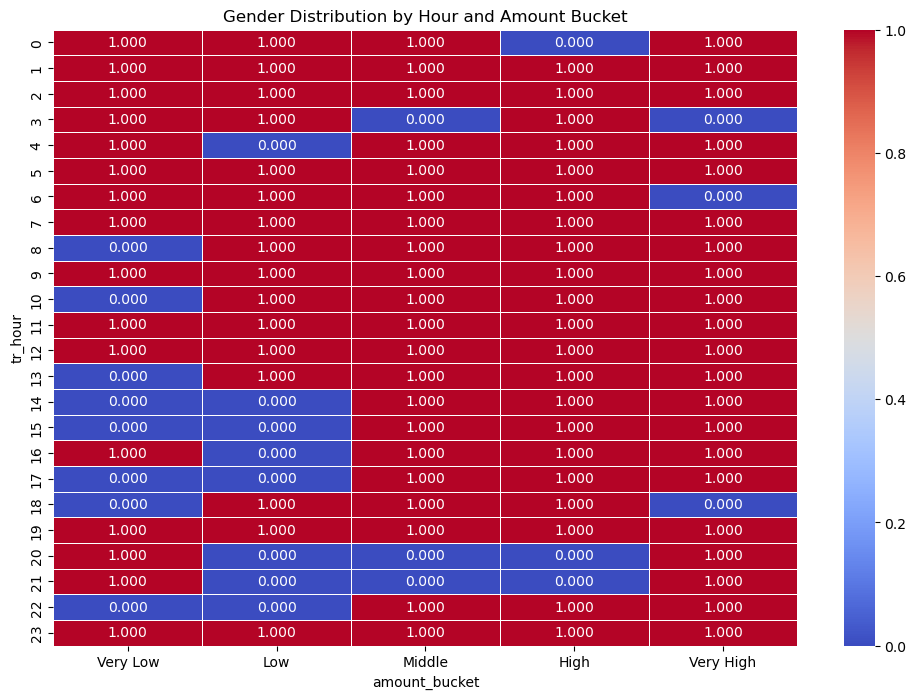

Ответ 1,3,5


In [49]:
# Type your code here
# Разбиение расходов на бакеты
merged_data['amount_bucket'] = pd.qcut(merged_data['amount'], q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                                       labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Отнесение неотрицательных трат к категории 'Income'
merged_data['amount_bucket'] = merged_data['amount_bucket'].cat.add_categories('Income')
merged_data['amount_bucket'] = merged_data['amount_bucket'].fillna('Income')

# Выделение часа tr_hour из tr_datetime
merged_data['tr_hour'] = merged_data['tr_datetime'].apply(lambda x: int(x.split()[1].split(':')[0]))

# Создание сводной таблицы
pivot_table = pd.pivot_table(merged_data, values='gender', index='tr_hour', columns='amount_bucket', aggfunc='first')

# Вывод сводной таблицы
print(pivot_table)

# Определение функции для отрисовки сводной таблицы
def plot_pivot_table(pivot_table):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="coolwarm", linewidths=.5)
    plt.title("Gender Distribution by Hour and Amount Bucket")
    plt.show()

# Отрисовка результатов
plot_pivot_table(pivot_table)
print('Ответ 1,3,5')

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

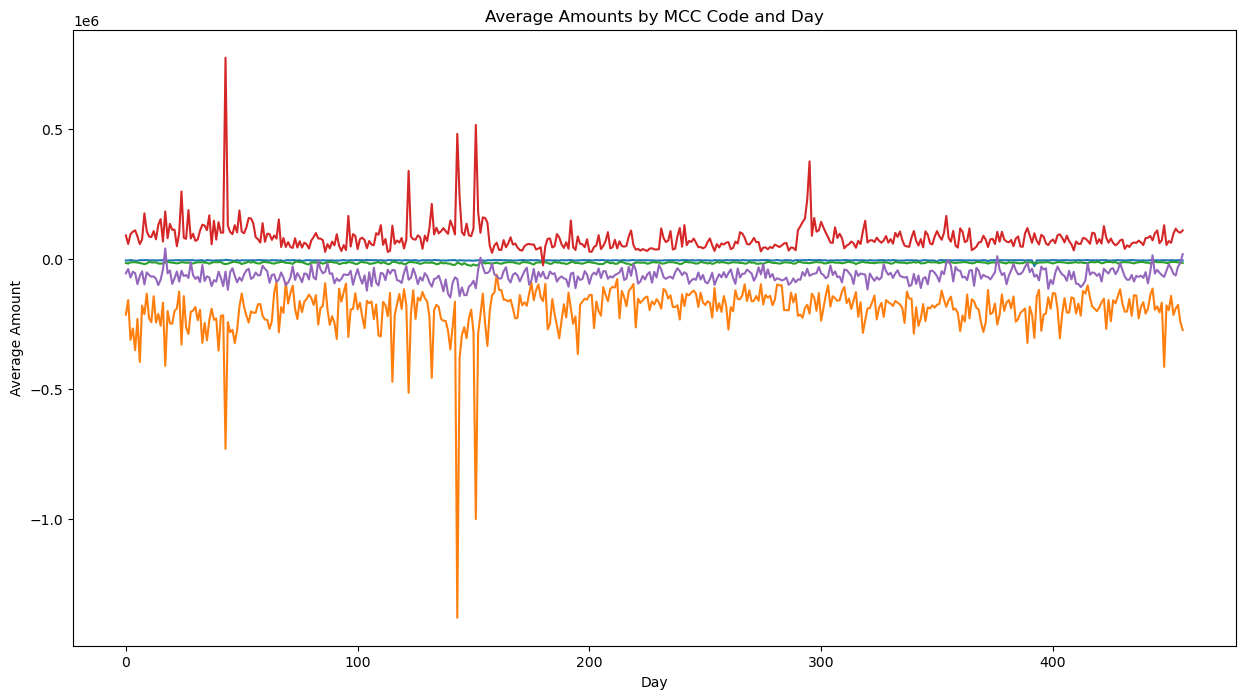

Ответы 2,4,5


In [53]:
# Type your code here
# Изменение типа поля tr_day на int
merged_data['tr_day'] = merged_data['tr_day'].astype(int)

# Выбор MCC кодов, встретившихся более чем 60000 раз
popular_mcc_codes = merged_data['mcc_code'].value_counts()[merged_data['mcc_code'].value_counts() > 60000].index

# Фильтрация датафрейма по выбранным MCC кодам
filtered_merged_data = merged_data[merged_data['mcc_code'].isin(popular_mcc_codes)]

# Группировка по дню и MCC коду, вычисление средней суммы amount
grouped_data = filtered_merged_data.groupby(['tr_day', 'mcc_code'])['amount'].mean().reset_index()

# Построение зависимости средних сумм по каждому MCC-коду по дням
pivot_table = grouped_data.pivot_table(values='amount', index='tr_day', columns='mcc_code', aggfunc='mean')
pivot_table.plot(figsize=(15, 8), legend=False)
plt.title('Average Amounts by MCC Code and Day')
plt.xlabel('Day')
plt.ylabel('Average Amount')
plt.show()
print('Ответы 2,4,5')